## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):   
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.0716 - acc: 0.2354 - val_loss: 2.0135 - val_acc: 0.2580
Epoch 2/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.8157 - acc: 0.3408 - val_loss: 1.7520 - val_acc: 0.3620
Epoch 3/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7435 - acc: 0.3693 - val_loss: 1.8047 - val_acc: 0.3578
Epoch 4/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6818 - acc: 0.3923 - val_loss: 1.7102 - val_acc: 0.3914
Epoch 5/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.6228 - acc: 0.4162 - val_loss: 1.6773 - val_acc: 0.3932
Epoch 6/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.5795 - acc: 0.4337 - val_loss: 1.7325 - val_acc: 0.3897
Epoch 7/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5505 - acc: 0.4473 - val_loss: 1.648

50000/50000 [==============================] - 11s 214us/step - loss: 2.2160 - acc: 0.1645 - val_loss: 2.0434 - val_acc: 0.1959
Epoch 2/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.0150 - acc: 0.2295 - val_loss: 1.9872 - val_acc: 0.2436
Epoch 3/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8992 - acc: 0.2977 - val_loss: 1.8707 - val_acc: 0.3196
Epoch 4/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8471 - acc: 0.3209 - val_loss: 1.8101 - val_acc: 0.3441
Epoch 5/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8046 - acc: 0.3501 - val_loss: 1.7946 - val_acc: 0.3482
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.7836 - acc: 0.3591 - val_loss: 1.8007 - val_acc: 0.3538
Epoch 7/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.7683 - acc: 0.3705 - val_loss: 1.8317 - val_acc: 0.3505
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 10s 207us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 10s 203us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 10s 199us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 206us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 200us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 203us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 10s 205us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50

50000/50000 [==============================] - 10s 199us/step - loss: 1.7488 - acc: 0.3785 - val_loss: 1.7686 - val_acc: 0.3793
Epoch 3/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.6729 - acc: 0.4068 - val_loss: 1.6426 - val_acc: 0.4142
Epoch 4/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.6227 - acc: 0.4257 - val_loss: 1.6352 - val_acc: 0.4042
Epoch 5/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.5800 - acc: 0.4418 - val_loss: 1.5444 - val_acc: 0.4520
Epoch 6/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.5428 - acc: 0.4541 - val_loss: 1.6221 - val_acc: 0.4194
Epoch 7/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5078 - acc: 0.4678 - val_loss: 1.5311 - val_acc: 0.4483
Epoch 8/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.4796 - acc: 0.4771 - val_loss: 1.6131 - val_acc: 0.4340
Epoch 9/50
50000/50000 [==============

Epoch 3/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5462 - acc: 0.4514 - val_loss: 1.5335 - val_acc: 0.4477
Epoch 4/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.4871 - acc: 0.4703 - val_loss: 1.6220 - val_acc: 0.4381
Epoch 5/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.4378 - acc: 0.4898 - val_loss: 1.4793 - val_acc: 0.4676
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.3974 - acc: 0.5050 - val_loss: 1.5319 - val_acc: 0.4612
Epoch 7/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.3563 - acc: 0.5212 - val_loss: 1.4218 - val_acc: 0.4914
Epoch 8/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.3277 - acc: 0.5279 - val_loss: 1.5194 - val_acc: 0.4579
Epoch 9/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.2915 - acc: 0.5425 - val_loss: 1.5095 - val_acc: 0.4664
Epoch 10/50
50000/50000 [===

Epoch 4/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.4560 - acc: 0.4839 - val_loss: 1.5015 - val_acc: 0.4655
Epoch 5/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.4020 - acc: 0.5014 - val_loss: 1.4363 - val_acc: 0.4834
Epoch 6/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.3618 - acc: 0.5164 - val_loss: 1.4580 - val_acc: 0.4870
Epoch 7/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.3290 - acc: 0.5277 - val_loss: 1.5597 - val_acc: 0.4567
Epoch 8/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.2949 - acc: 0.5393 - val_loss: 1.4155 - val_acc: 0.4938
Epoch 9/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.2652 - acc: 0.5494 - val_loss: 1.4551 - val_acc: 0.4918
Epoch 10/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.2354 - acc: 0.5604 - val_loss: 1.3984 - val_acc: 0.5040
Epoch 11/50
50000/50000 [==

50000/50000 [==============================] - 9s 187us/step - loss: 1.4370 - acc: 0.4873 - val_loss: 1.4861 - val_acc: 0.4744
Epoch 6/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.3973 - acc: 0.5019 - val_loss: 1.4624 - val_acc: 0.4834
Epoch 7/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.3812 - acc: 0.5055 - val_loss: 1.4605 - val_acc: 0.4849
Epoch 8/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.3528 - acc: 0.5180 - val_loss: 1.4514 - val_acc: 0.4891
Epoch 9/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.3435 - acc: 0.5231 - val_loss: 1.4673 - val_acc: 0.4883
Epoch 10/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.2970 - acc: 0.5386 - val_loss: 1.4415 - val_acc: 0.4908
Epoch 11/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.2781 - acc: 0.5437 - val_loss: 1.4354 - val_acc: 0.4938
Epoch 12/50
50000/50000 [================

Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8425 - acc: 0.3547 - val_loss: 1.8298 - val_acc: 0.3597
Epoch 7/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.8190 - acc: 0.3648 - val_loss: 1.8107 - val_acc: 0.3652
Epoch 8/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.7992 - acc: 0.3711 - val_loss: 1.7969 - val_acc: 0.3692: 0.
Epoch 9/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.7814 - acc: 0.3780 - val_loss: 1.7726 - val_acc: 0.3826
Epoch 10/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.7652 - acc: 0.3837 - val_loss: 1.7577 - val_acc: 0.3886
Epoch 11/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.7506 - acc: 0.3889 - val_loss: 1.7453 - val_acc: 0.3921
Epoch 12/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.7362 - acc: 0.3955 - val_loss: 1.7364 - val_acc: 0.3918
Epoch 13/50
50000/50

Epoch 7/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.6534 - acc: 0.4198 - val_loss: 1.6503 - val_acc: 0.4183: 1.6560 -
Epoch 8/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6264 - acc: 0.4317 - val_loss: 1.6304 - val_acc: 0.4237
Epoch 9/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.6026 - acc: 0.4383 - val_loss: 1.6208 - val_acc: 0.4274
Epoch 10/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5817 - acc: 0.4478 - val_loss: 1.5875 - val_acc: 0.4394
Epoch 11/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5618 - acc: 0.4541 - val_loss: 1.5780 - val_acc: 0.4429
Epoch 12/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5423 - acc: 0.4605 - val_loss: 1.5566 - val_acc: 0.4520
Epoch 13/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.5249 - acc: 0.4677 - val_loss: 1.5382 - val_acc: 0.4543
Epoch 14/50
5

50000/50000 [==============================] - 10s 193us/step - loss: 1.5583 - acc: 0.4526 - val_loss: 1.5563 - val_acc: 0.4495
Epoch 8/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5258 - acc: 0.4652 - val_loss: 1.5402 - val_acc: 0.4504
Epoch 9/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.4988 - acc: 0.4726 - val_loss: 1.5177 - val_acc: 0.4631
Epoch 10/50
50000/50000 [==============================] - 5771s 115ms/step - loss: 1.4738 - acc: 0.4828 - val_loss: 1.4943 - val_acc: 0.4693
Epoch 11/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.4482 - acc: 0.4901 - val_loss: 1.4782 - val_acc: 0.4751
Epoch 12/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.4250 - acc: 0.4975 - val_loss: 1.4889 - val_acc: 0.4722
Epoch 13/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.4035 - acc: 0.5058 - val_loss: 1.4381 - val_acc: 0.4901
Epoch 14/50
50000/50000 [===========

Epoch 8/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.3271 - acc: 0.5324 - val_loss: 1.3949 - val_acc: 0.5063
Epoch 9/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.3005 - acc: 0.5382 - val_loss: 1.4072 - val_acc: 0.5080
Epoch 10/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.2696 - acc: 0.5512 - val_loss: 1.3787 - val_acc: 0.5118
Epoch 11/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.2426 - acc: 0.5616 - val_loss: 1.3648 - val_acc: 0.5172
Epoch 12/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.2211 - acc: 0.5677 - val_loss: 1.3553 - val_acc: 0.5227
Epoch 13/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.1844 - acc: 0.5802 - val_loss: 1.3545 - val_acc: 0.5236
Epoch 14/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.1623 - acc: 0.5892 - val_loss: 1.3461 - val_acc: 0.5261
Epoch 15/50
50000/5000

50000/50000 [==============================] - 10s 200us/step - loss: 2.1356 - acc: 0.2520 - val_loss: 2.1308 - val_acc: 0.2558
Epoch 9/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.1211 - acc: 0.2586 - val_loss: 2.1166 - val_acc: 0.2601
Epoch 10/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.1072 - acc: 0.2637 - val_loss: 2.1030 - val_acc: 0.2705
Epoch 11/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.0941 - acc: 0.2711 - val_loss: 2.0903 - val_acc: 0.2731
Epoch 12/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.0817 - acc: 0.2752 - val_loss: 2.0780 - val_acc: 0.2793
Epoch 13/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.0699 - acc: 0.2813 - val_loss: 2.0663 - val_acc: 0.2826
Epoch 14/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.0587 - acc: 0.2851 - val_loss: 2.0552 - val_acc: 0.2889
Epoch 15/50
50000/50000 [========

Epoch 9/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.9570 - acc: 0.3188 - val_loss: 1.9505 - val_acc: 0.3192
Epoch 10/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.9383 - acc: 0.3259 - val_loss: 1.9335 - val_acc: 0.3278
Epoch 11/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.9218 - acc: 0.3313 - val_loss: 1.9177 - val_acc: 0.3276
Epoch 12/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.9068 - acc: 0.3363 - val_loss: 1.9036 - val_acc: 0.3367
Epoch 13/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.8933 - acc: 0.3419 - val_loss: 1.8915 - val_acc: 0.3388
Epoch 14/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.8809 - acc: 0.3447 - val_loss: 1.8794 - val_acc: 0.3427
Epoch 15/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.8699 - acc: 0.3481 - val_loss: 1.8692 - val_acc: 0.3445
Epoch 16/50
50000/500

50000/50000 [==============================] - 11s 213us/step - loss: 1.8330 - acc: 0.3621 - val_loss: 1.8267 - val_acc: 0.3644
Epoch 10/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.8170 - acc: 0.3676 - val_loss: 1.8115 - val_acc: 0.3694
Epoch 11/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.8026 - acc: 0.3727 - val_loss: 1.7985 - val_acc: 0.3751
Epoch 12/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.7893 - acc: 0.3760 - val_loss: 1.7840 - val_acc: 0.3809
Epoch 13/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.7772 - acc: 0.3814 - val_loss: 1.7742 - val_acc: 0.3835
Epoch 14/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.7665 - acc: 0.3862 - val_loss: 1.7618 - val_acc: 0.3859
Epoch 15/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.7560 - acc: 0.3892 - val_loss: 1.7524 - val_acc: 0.3884
Epoch 16/50
50000/50000 [=======

Epoch 10/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.6077 - acc: 0.4378 - val_loss: 1.6077 - val_acc: 0.4355
Epoch 11/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5854 - acc: 0.4463 - val_loss: 1.5891 - val_acc: 0.4418
Epoch 12/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.5658 - acc: 0.4533 - val_loss: 1.5739 - val_acc: 0.4454
Epoch 13/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.5483 - acc: 0.4588 - val_loss: 1.5596 - val_acc: 0.4474
Epoch 14/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.5301 - acc: 0.4654 - val_loss: 1.5438 - val_acc: 0.4570
Epoch 15/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5140 - acc: 0.4695 - val_loss: 1.5299 - val_acc: 0.4578
Epoch 16/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.4974 - acc: 0.4778 - val_loss: 1.5216 - val_acc: 0.4641
Epoch 17/50
50000/50

Epoch 11/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.2604 - acc: 0.1616 - val_loss: 2.2536 - val_acc: 0.1743
Epoch 12/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.2561 - acc: 0.1722 - val_loss: 2.2494 - val_acc: 0.1847
Epoch 13/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.2521 - acc: 0.1795 - val_loss: 2.2455 - val_acc: 0.1931
Epoch 14/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.2482 - acc: 0.1858 - val_loss: 2.2417 - val_acc: 0.1982
Epoch 15/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.2445 - acc: 0.1917 - val_loss: 2.2381 - val_acc: 0.2034
Epoch 16/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.2409 - acc: 0.1970 - val_loss: 2.2347 - val_acc: 0.2070
Epoch 17/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.2375 - acc: 0.2004 - val_loss: 2.2313 - val_acc: 0.2110
Epoch 18/50
50000/50

Epoch 12/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.2098 - acc: 0.2148 - val_loss: 2.2049 - val_acc: 0.2189
Epoch 13/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.2033 - acc: 0.2193 - val_loss: 2.1986 - val_acc: 0.2243
Epoch 14/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.1970 - acc: 0.2231 - val_loss: 2.1925 - val_acc: 0.2282
Epoch 15/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.1909 - acc: 0.2275 - val_loss: 2.1865 - val_acc: 0.2304
Epoch 16/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.1849 - acc: 0.2303 - val_loss: 2.1806 - val_acc: 0.2342
Epoch 17/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.1790 - acc: 0.2327 - val_loss: 2.1749 - val_acc: 0.2368
Epoch 18/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.1733 - acc: 0.2352 - val_loss: 2.1692 - val_acc: 0.2389
Epoch 19/50
50000/50

Epoch 13/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.1430 - acc: 0.2475 - val_loss: 2.1409 - val_acc: 0.2444
Epoch 14/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1334 - acc: 0.2515 - val_loss: 2.1316 - val_acc: 0.2494
Epoch 15/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.1242 - acc: 0.2562 - val_loss: 2.1226 - val_acc: 0.2540
Epoch 16/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.1154 - acc: 0.2588 - val_loss: 2.1140 - val_acc: 0.2572
Epoch 17/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.1069 - acc: 0.2641 - val_loss: 2.1057 - val_acc: 0.2605
Epoch 18/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.0988 - acc: 0.2678 - val_loss: 2.0976 - val_acc: 0.2618
Epoch 19/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0909 - acc: 0.2708 - val_loss: 2.0898 - val_acc: 0.2663
Epoch 20/50
50000/50000 [==

50000/50000 [==============================] - 6s 120us/step - loss: 1.8823 - acc: 0.3449 - val_loss: 1.8782 - val_acc: 0.3481
Epoch 15/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8714 - acc: 0.3489 - val_loss: 1.8680 - val_acc: 0.3499
Epoch 16/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.8609 - acc: 0.3535 - val_loss: 1.8580 - val_acc: 0.3507
Epoch 17/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8513 - acc: 0.3566 - val_loss: 1.8491 - val_acc: 0.3581
Epoch 18/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8424 - acc: 0.3598 - val_loss: 1.8408 - val_acc: 0.3568
Epoch 19/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8340 - acc: 0.3618 - val_loss: 1.8322 - val_acc: 0.3610
Epoch 20/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8261 - acc: 0.3632 - val_loss: 1.8255 - val_acc: 0.3646
Epoch 21/50
50000/50000 [==============

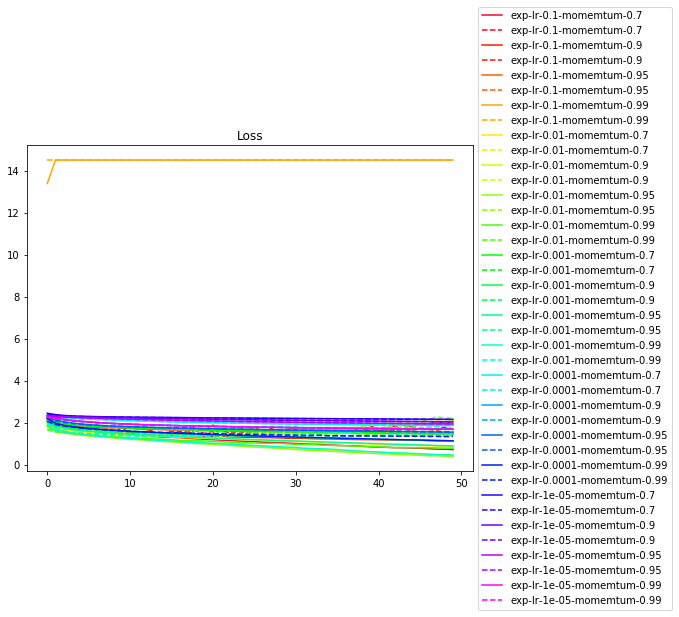

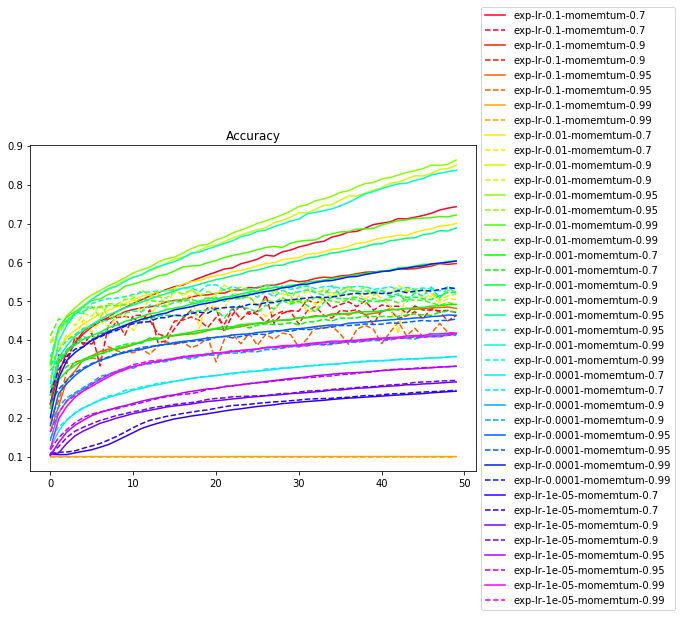

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()